In [14]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#from tensorflow import keras

In [15]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [18]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32")

In [19]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32")

In [20]:
opt = tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=10,
                   validation_data=(x_test, y_test_categorical))

Epoch 1/10
1563/1563 [==============================] - 44s 25ms/step - loss: 1.9198 - accuracy: 0.2829 - val_loss: 1.4981 - val_accuracy: 0.4716
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3058 - accuracy: 0.5322 - val_loss: 1.2361 - val_accuracy: 0.5539
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1528 - accuracy: 0.5924 - val_loss: 1.0946 - val_accuracy: 0.6078
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0309 - accuracy: 0.6369 - val_loss: 1.0838 - val_accuracy: 0.6157
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9524 - accuracy: 0.6670 - val_loss: 1.0446 - val_accuracy: 0.6385
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8747 - accuracy: 0.6973 - val_loss: 1.1047 - val_accuracy: 0.6207
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8562 - accuracy: 0.6996 - val_loss: 1.0514 -

313/313 - 2s - loss: 1.0689 - accuracy: 0.6576


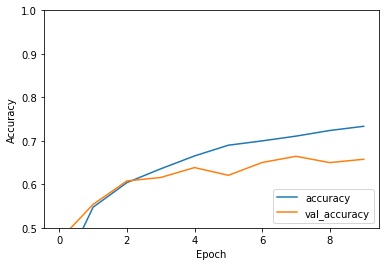

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)

In [22]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.3848400115966797, 0.5473600029945374, 0.6039199829101562, 0.635640025138855, 0.6652799844741821, 0.6898999810218811, 0.6998599767684937, 0.7107999920845032, 0.7237799763679504, 0.7333999872207642]
[0.4715999960899353, 0.5539000034332275, 0.6078000068664551, 0.6157000064849854, 0.6384999752044678, 0.6207000017166138, 0.6502000093460083, 0.6643999814987183, 0.6499000191688538, 0.6575999855995178]
